In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the main directory containing 'train' and 'test' subdirectories
main_dir = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\lipopoly\implem'

# Define the batch size for training
batch_size = 32  # You can adjust this based on your available memory

# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20%
    height_shift_range=0.2,  # Randomly shift image height by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Randomly zoom images by up to 20%
)

# Load and preprocess training data
train_data_gen = datagen.flow_from_directory(
    directory=main_dir + '/train',
    target_size=(224, 224),  # Specify your desired image size
    batch_size=batch_size,
    class_mode='binary',  # Assuming it's binary classification (with vs. without LPS)
    shuffle=True  # Shuffle the data for training
)

# Load and preprocess test data
test_data_gen = datagen.flow_from_directory(
    directory=main_dir + '/test',
    target_size=(224, 224),  # Specify your desired image size
    batch_size=batch_size,
    class_mode='binary',  # Assuming it's binary classification (with vs. without LPS)
    shuffle=False  # Don't shuffle the data for testing
)

# Now you can use train_data_gen and test_data_gen as data generators for training and testing your CNN model.


Found 51 images belonging to 2 classes.


Found 264 images belonging to 2 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Assuming 224x224 images
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Rest of the model remains the same


# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # 2 classes for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoded labels
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dimensions of your input images
image_height = 224
image_width = 224


# Define data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels with the nearest value
)

# Define data preprocessing for validation data (usually no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\lipopoly\implem\test',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)

validation_generator = validation_datagen.flow_from_directory(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\lipopoly\implem\test', 
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)


Found 264 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


In [14]:
# Define the number of epochs
epochs = 50

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/50
8/8 [==============================] - 14s 2s/step - loss: 0.0247 - accuracy: 0.9914 - val_loss: 7.2707e-04 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 5.3078e-04 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 0.0290 - accuracy: 0.9828 - val_loss: 2.1952e-04 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.5098e-04 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 14s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2217e-04 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 14s 2s/step - loss: 0.0312 - accuracy: 0.9957 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 0.0348 - accuracy: 0.9844 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/50
8/8

In [15]:
validation_results = model.evaluate(validation_generator)
print("Validation Loss:", validation_results[0])
print("Validation Accuracy:", validation_results[1])


9/9 [==============================] - 2s 239ms/step - loss: 3.3764e-05 - accuracy: 1.0000
Validation Loss: 3.3763575629564e-05
Validation Accuracy: 1.0


In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\lipopoly\implem\test',
    target_size=(224, 224),  # Modify these values if needed
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)

# Now you can proceed with making predictions
predictions = model.predict(test_generator)


Found 264 images belonging to 2 classes.


9/9 [==============================] - 2s 232ms/step


In [21]:
model.save('my_model.h5')  # Save the model to a file


c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


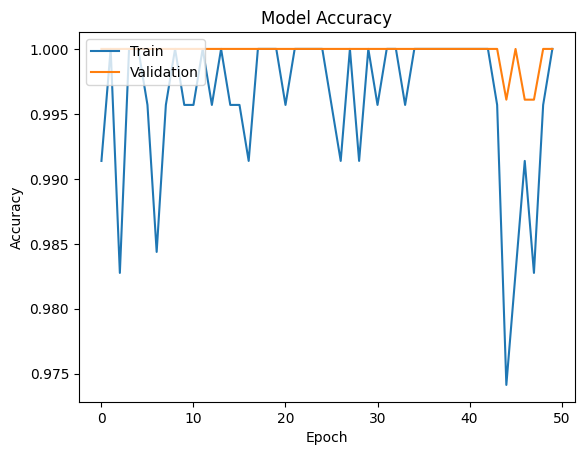

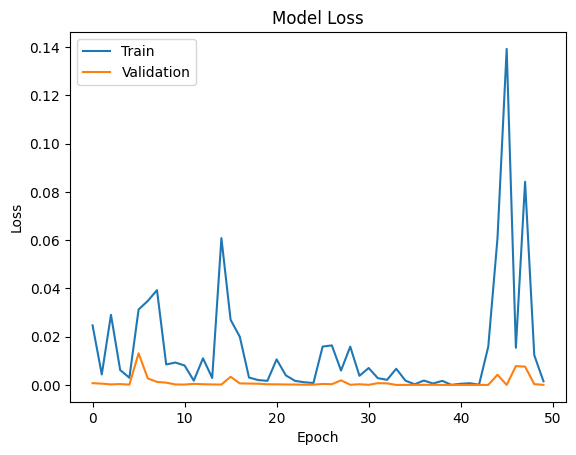

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 109ms/step


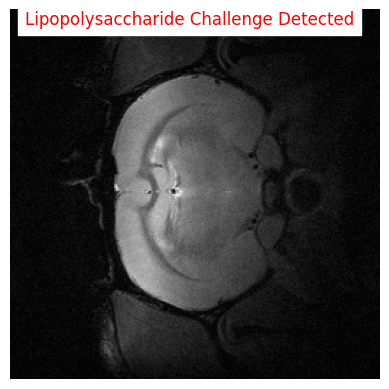

In [24]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size as needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize the image

    # Make predictions
    prediction = model.predict(img)

    # Display the image
    plt.imshow(mpimg.imread(image_path))
    plt.axis('off')

    # Interpret the prediction
    if prediction[0][0] > prediction[0][1]:
        result = "No Lipopolysaccharide Challenge"
    else:
        result = "Lipopolysaccharide Challenge Detected"

    # Display the prediction text on the plot
    plt.text(10, 10, result, color='red', backgroundcolor='white', fontsize=12)

    # Show the plot
    plt.show()

# Usage:
image_path = 'C:/Users/rithv/OneDrive/Desktop/cnn_rnn_models/lipopoly/slice_5.jpg'  # Replace with the path to your image
predict_image(image_path, model)
